In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

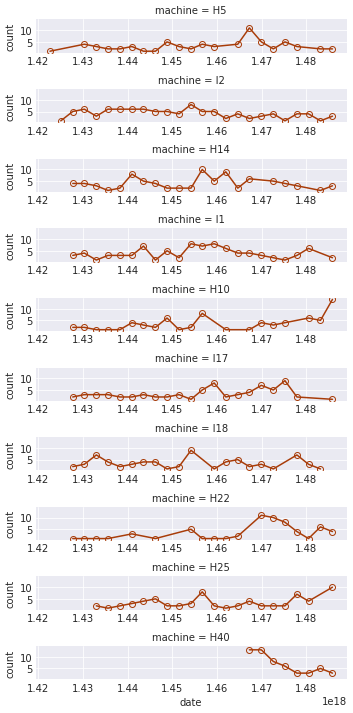

In [5]:
# get data
mdf = pd.read_csv('Machine_Date.csv', parse_dates=[0], usecols=[1,2])

# convieniece, make dates the index
mdf = mdf.set_index('date')

# resample to <month>, count occurences, go back to int index (adding counts)
mdat = mdf.resample("m").machine.value_counts().reset_index(name='count')

# find n_top machines with highest mean occurence per month 
n_top = 10
top_mach = mdat.groupby('machine').mean().sort_values('count', ascending=False).index[:n_top].tolist()

# plot it in a facetgrid. Could use hue=machine to go all in one plot, if desired. 
with sns.axes_style(style='darkgrid'):
    g = sns.FacetGrid(mdat[mdat.machine.isin(top_mach)], row='machine', size=1, aspect=5)
    g.map_dataframe(plt.plot, 'date', 'count', 
                    marker='o', 
                    markerfacecolor='none', 
                    color='xkcd:rust')
